<img style="float: right;" src="MetroMotion.png">

***T5 Data Science Bootcamp***
# Exploratory Data Analysis for the Metro Motion on the MTA

By Nouf Alotaibi
<br>
Email: noufmitla@gmail.com


### Table of Contents
- [Introduction](#Introduction)
- [Part I - Gather](#Gather)
- [Part II - Assess](#Assess)
- [Part III - Clean](#Clean)
- [Part IV - Storing, analyzing, and visualizing the wrangled data](#Storing,analyzing,visualizing)
- [Part V - Conclusion](#Conclusion)

## Introduction
This is the first project for the T5 Data Science Bootcamp, which is an exploratory data analysis of the MTA turnstile data set using SQL paired with Python and its libraries Pandas, NumPy, and Matplotlib. Below is a detail about the company I am collaborating with to help them with their problem, the dataset description, and the tools I will be using for the project. 
<br> <br>
I got approached by the company **Metro Motion** to help them improve their work schedule by estimating the appropriate times for repairing and cleaning. While working on this problem, I will be answering the questions below.

- What are the most active/inactive times for each station?
- What are the most active/inactive days of the week?
- When a station gets busy, does the satiations that are near getting busy too? Is there a relation?
- Is there a similarity between that dataset prior covid-19 and dataset now?
- What is the best schedule for the company?

<a id='Gather'></a>
## Part l - Gather
 Gather each of the four pieces of data as described below: 
> - *Turnstile dataset from 2021 - July*
> - *Turnstile dataset from 2021 - June*
> - *Turnstile dataset from 2019 - November*
> - *Turnstile dataset from 2019 - October*

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)

In [3]:
# Reading dataset for 2021 - July
jul21_df = get_data([210703, 210710, 210717, 210724, 210731])

# Reading dataset for 2021 - June
jun21_df = get_data([210605, 210612, 210619, 210626])

df_21 = pd.concat([jul21_df, jun21_df])
df_21.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,00:00:00,REGULAR,7592792,2595706
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,04:00:00,REGULAR,7592804,2595713
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,08:00:00,REGULAR,7592816,2595729
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,12:00:00,REGULAR,7592870,2595762
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,16:00:00,REGULAR,7592992,2595791


In [4]:
# Reading dataset for 2019 - November
nov19_df = get_data([191102, 191109, 191116, 191123, 191130])

# Reading dataset for 2019 - October
oct19_df = get_data([191005, 191012, 191019, 191026])

df_19 = pd.concat([nov19_df, oct19_df])
df_19.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,00:00:00,REGULAR,7247322,2455491
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,04:00:00,REGULAR,7247336,2455499
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,08:00:00,REGULAR,7247351,2455532
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,12:00:00,REGULAR,7247463,2455623
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,16:00:00,REGULAR,7247755,2455679


In [5]:
# Concatenating 2021 and 2019 datasets
MTA_df = pd.concat([df_21, df_19])
MTA_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,00:00:00,REGULAR,7592792,2595706
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,04:00:00,REGULAR,7592804,2595713
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,08:00:00,REGULAR,7592816,2595729
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,12:00:00,REGULAR,7592870,2595762
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,16:00:00,REGULAR,7592992,2595791


In [6]:
# Saving datasets in CSV file
# df_21.to_csv('MTA_21_dataset.csv', encoding = 'utf-8', index=False)
# df_19.to_csv('MTA_19_dataset.csv', encoding = 'utf-8', index=False)
# MTA_df.to_csv('MTA_dataset.csv', encoding = 'utf-8', index=False)

<a id='Assess'></a>
## Part ll - Assess

After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues.

In [7]:
# Connecting to SQLite
from sqlalchemy import create_engine

engine = create_engine("sqlite:///mta_eda.db")

In [8]:
engine.table_names()

['turnstiles', 'turnstiles_19', 'turnstiles_21']

### *MTA Dataset*

In [9]:
MTA_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3740978 entries, 0 to 205594
Data columns (total 11 columns):
 #   Column                                                                Dtype 
---  ------                                                                ----- 
 0   C/A                                                                   object
 1   UNIT                                                                  object
 2   SCP                                                                   object
 3   STATION                                                               object
 4   LINENAME                                                              object
 5   DIVISION                                                              object
 6   DATE                                                                  object
 7   TIME                                                                  object
 8   DESC                                                           

In [10]:
MTA_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

Gonna remove this whitespace here, to make assesing the data much easier.

In [11]:
# Function to remove whitespace
def strip_names(names_list):
    stripped_names = []
    for name in names_list:
        stripped_names.append(name.strip())
    return stripped_names

In [12]:
MTA_df.columns = strip_names(MTA_df.columns)
MTA_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [13]:
print("Number of unique values in Date: ", MTA_df['DATE'].nunique())
MTA_df['DATE'].unique()

Number of unique values in Date:  126


array(['06/26/2021', '06/27/2021', '06/28/2021', '06/29/2021',
       '06/30/2021', '07/01/2021', '07/02/2021', '07/03/2021',
       '07/04/2021', '07/05/2021', '07/06/2021', '07/07/2021',
       '07/08/2021', '07/09/2021', '07/10/2021', '07/11/2021',
       '07/12/2021', '07/13/2021', '07/14/2021', '07/15/2021',
       '07/16/2021', '07/17/2021', '07/18/2021', '07/19/2021',
       '07/20/2021', '07/21/2021', '07/22/2021', '07/23/2021',
       '07/24/2021', '07/25/2021', '07/26/2021', '07/27/2021',
       '07/28/2021', '07/29/2021', '07/30/2021', '05/29/2021',
       '05/30/2021', '05/31/2021', '06/01/2021', '06/02/2021',
       '06/03/2021', '06/04/2021', '06/05/2021', '06/06/2021',
       '06/07/2021', '06/08/2021', '06/09/2021', '06/10/2021',
       '06/11/2021', '06/12/2021', '06/13/2021', '06/14/2021',
       '06/15/2021', '06/16/2021', '06/17/2021', '06/18/2021',
       '06/19/2021', '06/20/2021', '06/21/2021', '06/22/2021',
       '06/23/2021', '06/24/2021', '06/25/2021', '10/26

Interesting, there are days from the months **May** and **september**. 

In [14]:
print("Number of unique values in STATION: ", MTA_df['STATION'].nunique())
MTA_df['STATION'].unique()

Number of unique values in STATION:  379


array(['59 ST', '5 AV/59 ST', '57 ST-7 AV', '49 ST', 'TIMES SQ-42 ST',
       '34 ST-HERALD SQ', '28 ST', '23 ST', '14 ST-UNION SQ', '8 ST-NYU',
       'PRINCE ST', 'CANAL ST', 'CITY HALL', 'CORTLANDT ST', 'RECTOR ST',
       'WHITEHALL S-FRY', 'DELANCEY/ESSEX', 'BOWERY', 'CHAMBERS ST',
       'FULTON ST', 'BROAD ST', '7 AV', 'PARK PLACE', 'BOTANIC GARDEN',
       'PROSPECT PARK', 'PARKSIDE AV', 'CHURCH AV', 'BEVERLEY ROAD',
       'CORTELYOU RD', 'NEWKIRK PLAZA', 'AVENUE H', 'AVENUE J',
       'AVENUE M', 'KINGS HWY', 'AVENUE U', 'NECK RD', 'SHEEPSHEAD BAY',
       'BRIGHTON BEACH', 'OCEAN PKWY', 'BOROUGH HALL', 'JAY ST-METROTEC',
       'DEKALB AV', 'ATL AV-BARCLAY', 'UNION ST', '4AV-9 ST',
       'PROSPECT AV', '25 ST', '36 ST', '45 ST', '53 ST', 'BAY RIDGE AV',
       '77 ST', '86 ST', 'BAY RIDGE-95 ST', '8 AV', 'FT HAMILTON PKY',
       'NEW UTRECHT AV', '18 AV', '20 AV', 'BAY PKWY', '9 AV', '50 ST',
       '55 ST', '71 ST', '79 ST', '25 AV', 'BAY 50 ST', 'CONEY IS-STILLW',
      

In [15]:
print("Number of unique values in UNIT: ", MTA_df['UNIT'].nunique())
MTA_df['UNIT'].unique()

Number of unique values in UNIT:  470


array(['R051', 'R079', 'R080', 'R081', 'R032', 'R022', 'R023', 'R082',
       'R083', 'R170', 'R085', 'R086', 'R462', 'R463', 'R087', 'R088',
       'R227', 'R001', 'R142', 'R311', 'R118', 'R044', 'R028', 'R125',
       'R171', 'R411', 'R412', 'R196', 'R148', 'R098', 'R262', 'R184',
       'R149', 'R263', 'R228', 'R229', 'R211', 'R150', 'R230', 'R136',
       'R172', 'R264', 'R108', 'R089', 'R099', 'R057', 'R231', 'R258',
       'R246', 'R278', 'R455', 'R197', 'R232', 'R233', 'R212', 'R213',
       'R214', 'R215', 'R216', 'R390', 'R391', 'R398', 'R392', 'R393',
       'R394', 'R395', 'R396', 'R397', 'R368', 'R369', 'R234', 'R247',
       'R370', 'R371', 'R372', 'R373', 'R374', 'R399', 'R400', 'R151',
       'R312', 'R175', 'R163', 'R330', 'R248', 'R235', 'R268', 'R249',
       'R250', 'R265', 'R294', 'R279', 'R236', 'R137', 'R266', 'R295',
       'R313', 'R348', 'R349', 'R350', 'R375', 'R376', 'R152', 'R535',
       'R536', 'R460', 'R352', 'R353', 'R377', 'R378', 'R379', 'R380',
      

In [16]:
print("Number of unique values in C/A: ", MTA_df['C/A'].nunique())
MTA_df['C/A'].unique()

Number of unique values in C/A:  752


array(['A002', 'A006', 'A007', 'A010', 'A011', 'A013', 'A014', 'A015',
       'A016', 'A021', 'A022', 'A025', 'A027', 'A029', 'A030', 'A031',
       'A033', 'A034', 'A035', 'A037', 'A038', 'A039', 'A041', 'A042',
       'A043', 'A046', 'A047', 'A049', 'A050', 'A052', 'A053', 'A054',
       'A055', 'A058', 'A060', 'A061', 'A064', 'A066', 'A069', 'A071',
       'A077', 'A081', 'A082', 'A083', 'A084', 'A085', 'B004', 'B009',
       'B010', 'B012', 'B013', 'B014', 'B015', 'B016', 'B017', 'B018',
       'B019', 'B020', 'B021', 'B022', 'B023', 'B024', 'B024A', 'B025',
       'B026', 'B027', 'B028', 'B029', 'B031', 'B032', 'B034', 'C001',
       'C003', 'C004', 'C008', 'C009', 'C010', 'C011', 'C012', 'C014',
       'C015', 'C016', 'C017', 'C018', 'C019', 'C020', 'C021', 'C022',
       'C023', 'C024', 'C025', 'C026', 'C027', 'C028', 'D001', 'D002',
       'D003', 'D004', 'D005', 'D006', 'D008', 'D009', 'D010', 'D011',
       'D012', 'D015', 'D016', 'E001', 'E003', 'E004', 'E005', 'E009',
     

In [17]:
print("Number of unique values in SCP: ", MTA_df['SCP'].nunique())
MTA_df['SCP'].unique()

Number of unique values in SCP:  229


array(['02-00-00', '02-00-01', '02-03-00', '02-03-01', '02-03-02',
       '02-03-03', '02-03-04', '02-03-05', '02-03-06', '02-05-00',
       '02-05-01', '02-06-00', '00-00-00', '00-00-01', '00-00-02',
       '00-00-03', '00-00-04', '00-03-00', '00-03-01', '00-03-02',
       '01-05-00', '01-05-01', '01-06-00', '01-06-01', '01-06-02',
       '01-06-03', '00-00-05', '00-00-06', '00-00-07', '01-00-00',
       '01-00-01', '01-00-02', '01-00-03', '01-00-04', '01-03-00',
       '01-03-01', '01-03-02', '01-03-03', '01-03-04', '02-00-02',
       '02-06-01', '03-00-00', '03-00-01', '03-00-02', '03-06-00',
       '03-06-01', '01-00-05', '01-00-06', '01-00-07', '02-00-03',
       '02-00-04', '02-00-05', '03-03-00', '03-03-01', '03-03-02',
       '03-05-00', '03-05-01', '03-05-02', '03-05-03', '05-00-00',
       '05-00-01', '05-00-02', '05-00-03', '00-03-03', '00-03-04',
       '00-06-00', '00-06-01', '00-06-02', '00-05-00', '00-05-01',
       '00-05-02', '00-05-03', '00-06-03', '00-06-04', '00-06-

In [18]:
print("Number of unique values in DIVISION: ", MTA_df['DIVISION'].nunique())
MTA_df['DIVISION'].unique()

Number of unique values in DIVISION:  6


array(['BMT', 'IND', 'PTH', 'IRT', 'SRT', 'RIT'], dtype=object)

In [19]:
print("Number of unique values in LINENAME: ", MTA_df['LINENAME'].nunique())
MTA_df['LINENAME'].unique()

Number of unique values in LINENAME:  114


array(['NQR456W', 'NQRW', 'ACENQRS1237W', 'BDFMNQRW', 'NRW', 'LNQR456W',
       'JNQRZ6W', 'RNW', 'R1W', 'FJMZ', 'JZ', 'JZ456', 'ACJZ2345', 'BQ',
       'S', 'S2345', 'BQS', 'Q', 'R2345', 'R', 'BDNQR', 'BDNQR2345',
       'DFGMNR', 'DNR', 'N', 'ND', 'D', 'DFNQ', 'FQ', 'ACEL', 'FLM123',
       'L', 'LG', 'LM', 'A', 'E', 'JMZ', 'JM', 'J', 'M', 'AC1', 'C',
       'ABCD', 'BC', 'ACBD', 'ABCD1', 'CE', 'ACENGRS1237W', 'ACE',
       'ABCDEFM', 'ACE23', '2345ACJZ', 'AC', 'ACF', 'ACG', 'ACS', 'ACJLZ',
       'AS', 'BD', 'BD4', 'BDE', 'EM', 'EM6', 'EMG', 'EMR', 'MR', 'EFMR7',
       'EFMR', 'EF', 'F', 'G', 'GL', 'BDFM', 'BDFM7', 'FM', 'BDFQ6', 'FG',
       'EJZ', '6', '1', '1RW', '23', '23ACE', '123', '123FLM', '123ACE',
       '1237ACENQRSW', '1237ACENQRS', '1ABCD', '1AC', '45', '456JZ',
       '6DF', '456LNQRW', '4567S', '456NQRW', '456', '245', '4BD', '4',
       '3', '25', '2', '7BDFM', '7', '7NQW', 'NQW', '7EFMR', '2345R',
       '2345', '2345BDNQR', '2345S', '34', '5'], dtype=object)

In [20]:
print("Number of unique values in DESC: ", MTA_df['DESC'].nunique())
MTA_df['DESC'].value_counts()

Number of unique values in DESC:  2


REGULAR       3723874
RECOVR AUD      17104
Name: DESC, dtype: int64

In [21]:
print("Total number of null values: ", MTA_df.isnull().sum().sum())

Total number of null values:  0


In [22]:
print("Total number of duplicate rows: ", MTA_df.duplicated().sum())

Total number of duplicate rows:  0


Ok, so no null values but also no duplicates? interesting! let's investigate more.

In [23]:
num_of_turnstiles = (MTA_df.groupby(['DIVISION', 'UNIT', 'C/A', 'STATION', 'SCP'], as_index = False)['ENTRIES'].count())
num_of_turnstiles['ENTRIES'].sum()

3740978

So, from the anlaysis above: 
<br>
>- Number of Divisions = 6
>- Number of Stations = 379
>- Number of Units = 470
>- Number of C/A = 572
>- Number of SCP = 229
>- Number of LINENAME = 114
>- There is two types of DESC, which are REGULAR and RECOVR AUD.
>- There is no null values or duplicates so far.
>
><center>(<b>Divison</b> > <b>Station</b> => <b>Unit</b> > <b>C/A</b> > <b>SCP</b>)</center>
<br>
More than one turnstile can go through an SCP within a unique C/A; all of this happens within a unique Unit. A unit can represent a station, but a station can have a lot of units. The Division is like an area that contains a lot of stations.
<br><br>
So, what makes a turnstile unique is by its (Divison, Station, Unit, C/A, SCP). However, I don't know yet if there is duplicates in turnstiles, Let's see!

In [24]:
MTA_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3740978 entries, 0 to 205594
Data columns (total 11 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   C/A       object
 1   UNIT      object
 2   SCP       object
 3   STATION   object
 4   LINENAME  object
 5   DIVISION  object
 6   DATE      object
 7   TIME      object
 8   DESC      object
 9   ENTRIES   int64 
 10  EXITS     int64 
dtypes: int64(2), object(9)
memory usage: 342.5+ MB


In [25]:
MTA_df["DATE_TIME"] = pd.to_datetime(MTA_df['DATE'] + " " + MTA_df['TIME'])
MTA_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,00:00:00,REGULAR,7592792,2595706,2021-06-26 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,04:00:00,REGULAR,7592804,2595713,2021-06-26 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,08:00:00,REGULAR,7592816,2595729,2021-06-26 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,12:00:00,REGULAR,7592870,2595762,2021-06-26 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,16:00:00,REGULAR,7592992,2595791,2021-06-26 16:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
205590,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/25/2019,05:00:00,REGULAR,5554,420,2019-10-25 05:00:00
205591,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/25/2019,09:00:00,REGULAR,5554,420,2019-10-25 09:00:00
205592,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/25/2019,13:00:00,REGULAR,5554,420,2019-10-25 13:00:00
205593,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/25/2019,17:00:00,REGULAR,5554,420,2019-10-25 17:00:00


In [26]:
MTA_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3740978 entries, 0 to 205594
Data columns (total 12 columns):
 #   Column     Dtype         
---  ------     -----         
 0   C/A        object        
 1   UNIT       object        
 2   SCP        object        
 3   STATION    object        
 4   LINENAME   object        
 5   DIVISION   object        
 6   DATE       object        
 7   TIME       object        
 8   DESC       object        
 9   ENTRIES    int64         
 10  EXITS      int64         
 11  DATE_TIME  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 371.0+ MB


After creating column DATE_TIME, now lets calculate if there is see unique turnstiles

In [27]:
turnstiles = (MTA_df.groupby(['DIVISION','C/A', 'UNIT', 'STATION', 'SCP', 'DATE_TIME'], as_index = False)['ENTRIES']
              .count())
turnstiles

,DIVISION,C/A,UNIT,STATION,SCP,DATE_TIME,ENTRIES
0,BMT,A002,R051,59 ST,02-00-00,2019-09-28 00:00:00,1
1,BMT,A002,R051,59 ST,02-00-00,2019-09-28 04:00:00,1
2,BMT,A002,R051,59 ST,02-00-00,2019-09-28 08:00:00,1
3,BMT,A002,R051,59 ST,02-00-00,2019-09-28 12:00:00,1
4,BMT,A002,R051,59 ST,02-00-00,2019-09-28 16:00:00,1
...,...,...,...,...,...,...,...
3740899,SRT,S102,R165,TOMPKINSVILLE,00-05-01,2021-07-30 06:00:00,1
3740900,SRT,S102,R165,TOMPKINSVILLE,00-05-01,2021-07-30 10:00:00,1
3740901,SRT,S102,R165,TOMPKINSVILLE,00-05-01,2021-07-30 14:00:00,1
3740902,SRT,S102,R165,TOMPKINSVILLE,00-05-01,2021-07-30 18:00:00,1


In [28]:
print(turnstiles['ENTRIES'].unique())
turnstiles[turnstiles['ENTRIES'] == 2]

[1 2]


,DIVISION,C/A,UNIT,STATION,SCP,DATE_TIME,ENTRIES
340369,BMT,B029,R172,BRIGHTON BEACH,00-00-00,2019-10-23 12:00:00,2
806495,BMT,R514,R094,ASTORIA BLVD,00-05-00,2021-07-22 00:00:00,2
806496,BMT,R514,R094,ASTORIA BLVD,00-05-00,2021-07-22 04:00:00,2
806499,BMT,R514,R094,ASTORIA BLVD,00-05-00,2021-07-22 08:00:00,2
806500,BMT,R514,R094,ASTORIA BLVD,00-05-00,2021-07-22 12:00:00,2
...,...,...,...,...,...,...,...
2864637,IRT,R285,R308,MT EDEN AV,00-00-00,2019-11-07 19:00:00,2
2864638,IRT,R285,R308,MT EDEN AV,00-00-00,2019-11-07 23:00:00,2
2864639,IRT,R285,R308,MT EDEN AV,00-00-00,2019-11-08 03:00:00,2
2864640,IRT,R285,R308,MT EDEN AV,00-00-00,2019-11-08 07:00:00,2


Interesting! We can see that there are some turnstiles that have **2** entries at the same time, let's take some of these turnstiles and check them.

In [29]:
duplicate_1 = MTA_df[(MTA_df["C/A"] == "B029") & 
               (MTA_df["UNIT"] == "R172") & 
               (MTA_df["STATION"] == "BRIGHTON BEACH") & 
               (MTA_df["SCP"] == "00-00-00") &
               (MTA_df["DATE_TIME"] == "2019-10-23 12:00:00")]
duplicate_1

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
18670,B029,R172,00-00-00,BRIGHTON BEACH,BQ,BMT,10/23/2019,12:00:00,REGULAR,13555766,10249063,2019-10-23 12:00:00
18671,B029,R172,00-00-00,BRIGHTON BEACH,BQ,BMT,10/23/2019,12:00:00,RECOVR AUD,9,0,2019-10-23 12:00:00


In [30]:
duplicate_2 = MTA_df[(MTA_df["C/A"] == "R107") & 
              (MTA_df["UNIT"] == "R305") & 
              (MTA_df["STATION"] == "WTC-CORTLANDT") & 
              (MTA_df["SCP"] == "00-00-00") &
              (MTA_df["DATE_TIME"] == "2019-10-06 17:00:00")]
duplicate_2

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
130642,R107,R305,00-00-00,WTC-CORTLANDT,1,IRT,10/06/2019,17:00:00,REGULAR,132387,100659,2019-10-06 17:00:00
130643,R107,R305,00-00-00,WTC-CORTLANDT,1,IRT,10/06/2019,17:00:00,RECOVR AUD,730842595,39047,2019-10-06 17:00:00


Okay, we can see that duplicate turnstiles are related to the turnstiles having **RECOVR AUD** in DESC!

In [31]:
# ENTRIES
print("Number of ENTRIES == 0: ", (MTA_df['ENTRIES'] == 0).sum())
print("Number of ENTRIES < 0: ", (MTA_df['ENTRIES'] < 0).sum())

# EXITS
print("\nNumber of EXITS == 0: ", (MTA_df['EXITS'] == 0).sum())
print("Number of EXITS < 0: ", (MTA_df['EXITS'] < 0).sum())

# ENTRIES & EXITS
print("\nNumber of ENTRIES == 0 AND EXITS == 0: ", ((MTA_df['ENTRIES'] == 0) & (MTA_df['EXITS'] == 0)).sum())

Number of ENTRIES == 0:  55213
Number of ENTRIES < 0:  0

Number of EXITS == 0:  149273
Number of EXITS < 0:  0

Number of ENTRIES == 0 AND EXITS == 0:  1701


In [32]:
print(MTA_df['ENTRIES'].describe())
print("\n")
print(MTA_df['EXITS'].describe())

count    3.740978e+06
mean     4.165500e+07
std      2.161429e+08
min      0.000000e+00
25%      2.555992e+05
50%      1.710782e+06
75%      6.366728e+06
max      2.147417e+09
Name: ENTRIES, dtype: float64


count    3.740978e+06
mean     3.377929e+07
std      1.944228e+08
min      0.000000e+00
25%      1.168710e+05
50%      1.007158e+06
75%      4.207836e+06
max      2.123735e+09
Name: EXITS, dtype: float64


### *Quality Issues* 
Issues with content: Completeness, Validity, Accuracy, Consistency.

> - DATE and TIME are not datatime type.
> - The columns' names have whitespace.
> - There are **duplicate turnstiles**.
> - Turnstiles having **RECOVR AUD** in DESC.
> - There are **0**'s in ENNTRIES and EXISTS

<a id='Clean'></a>
## Part lll - Clean

In [33]:
MTA_df["DATE"] = pd.to_datetime(MTA_df["DATE"])
MTA_df["TIME"] = pd.to_datetime(MTA_df["TIME"]).dt.time

In [34]:
MTA_df = MTA_df[(MTA_df['DESC'] != 'RECOVR AUD')]

In [35]:
turnstiles = (MTA_df.groupby(['DIVISION','C/A', 'UNIT', 'STATION', 'SCP', 'DATE_TIME'], as_index = False)['ENTRIES']
              .count())
turnstiles.head()

,DIVISION,C/A,UNIT,STATION,SCP,DATE_TIME,ENTRIES
0,BMT,A002,R051,59 ST,02-00-00,2019-09-28 00:00:00,1
1,BMT,A002,R051,59 ST,02-00-00,2019-09-28 04:00:00,1
2,BMT,A002,R051,59 ST,02-00-00,2019-09-28 08:00:00,1
3,BMT,A002,R051,59 ST,02-00-00,2019-09-28 12:00:00,1
4,BMT,A002,R051,59 ST,02-00-00,2019-09-28 16:00:00,1


In [36]:
print(turnstiles['ENTRIES'].unique())
turnstiles[turnstiles['ENTRIES'] == 2]

[1]


,DIVISION,C/A,UNIT,STATION,SCP,DATE_TIME,ENTRIES


Good! Duplicate turnstiles got removed! Also, since now we only have one value in DESC, let's just drop the column. 

In [37]:
MTA_df = MTA_df.drop(['DESC'], axis=1, errors="ignore")
MTA_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'ENTRIES', 'EXITS', 'DATE_TIME'],
      dtype='object')

Let's play with **time** and **date**:
- I will extract day, month, and year from DATE column
- I will extract hours from TIME column and create a new column to represent the hours in periods of time. 

In [38]:
MTA_df['DAY'] = MTA_df['DATE'].dt.day_name()
MTA_df['YEAR'] = MTA_df['DATE'].dt.year
MTA_df['MONTH'] = MTA_df['DATE'].dt.month_name()

In [39]:
bins = [0, 5, 13, 17, 25]
time_periods = ['Morning','Afternoon','Evening','Night']
hours = MTA_df['DATE_TIME'].dt.hour
MTA_df['TIME_PERIOD'] = pd.cut(hours-5+24 *(hours<5), bins=bins, labels=time_periods, right=False)

Let's reorder the columns in MTA_df.

In [40]:
# columns = ['DIVISION', 'STATION', 'UNIT', 'C/A', 'SCP', 'LINENAME', 'DATE_TIME', 'ENTRIES','EXITS','DATE', 'YEAR', 
#            'MONTH', 'DAY', 'TIME', 'TIME_PERIOD']
# MTA_df = MTA_df.reindex(columns = columns)
# MTA_df.head()

Let's now separate the two datasets to investigate the ENTRIES and EIXTS more!
- 2019 Dataset = **turnstiles_19**
- 2021 Dataset = **turnstiles_21**

In [41]:
turnstiles_19 = MTA_df[(MTA_df['YEAR'] == 2019)]
turnstiles_21 = MTA_df[(MTA_df['YEAR'] == 2021)]

### *MTA 2019 Dataset*

In [42]:
print("There are", turnstiles_19.shape[0], "records in turnstiles_19")
turnstiles_19.head()

There are 1847241 records in turnstiles_19


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,DAY,YEAR,MONTH,TIME_PERIOD
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-10-26,00:00:00,7247322,2455491,2019-10-26 00:00:00,Saturday,2019,October,Night
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-10-26,04:00:00,7247336,2455499,2019-10-26 04:00:00,Saturday,2019,October,Night
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-10-26,08:00:00,7247351,2455532,2019-10-26 08:00:00,Saturday,2019,October,Morning
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-10-26,12:00:00,7247463,2455623,2019-10-26 12:00:00,Saturday,2019,October,Afternoon
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-10-26,16:00:00,7247755,2455679,2019-10-26 16:00:00,Saturday,2019,October,Afternoon


Let's reorder the turnstiles_19 by the **DATE_TIME**. 

In [43]:
turnstiles_19 = turnstiles_19.sort_values(['DIVISION','STATION','UNIT','C/A','SCP','DATE_TIME'], ascending=True)
turnstiles_19.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,DAY,YEAR,MONTH,TIME_PERIOD
32057,H007,R248,00-00-00,1 AV,L,BMT,2019-09-28,00:00:00,15011834,16775459,2019-09-28 00:00:00,Saturday,2019,September,Night
32058,H007,R248,00-00-00,1 AV,L,BMT,2019-09-28,04:00:00,15011834,16775459,2019-09-28 04:00:00,Saturday,2019,September,Night
32059,H007,R248,00-00-00,1 AV,L,BMT,2019-09-28,08:00:00,15011834,16775461,2019-09-28 08:00:00,Saturday,2019,September,Morning
32060,H007,R248,00-00-00,1 AV,L,BMT,2019-09-28,12:00:00,15011834,16775480,2019-09-28 12:00:00,Saturday,2019,September,Afternoon
32061,H007,R248,00-00-00,1 AV,L,BMT,2019-09-28,16:00:00,15011834,16775500,2019-09-28 16:00:00,Saturday,2019,September,Afternoon


In [44]:
turnstiles_19['MONTH'].value_counts()

October      909882
November     849509
September     87850
Name: MONTH, dtype: int64

As we have discussed before, there were some recordes related to May and September in MTA_df. Here, we can see that the number of **September** records are **87850**, So we need to drop them. 
<br><br> 

In [45]:
turnstiles_19 = turnstiles_19[turnstiles_19['MONTH'] != 'September']
turnstiles_19['MONTH'].value_counts()

October     909882
November    849509
Name: MONTH, dtype: int64

Let's take a look at the **ENTRIES** and **EXITS** in turnstiles_19.

In [46]:
# ENTRIES
print("Number of ENTRIES == 0: ", (turnstiles_19['ENTRIES'] == 0).sum())
print("Number of ENTRIES < 0: ", (turnstiles_19['ENTRIES'] < 0).sum())

# EXITS
print("\nNumber of EXITS == 0: ", (turnstiles_19['EXITS'] == 0).sum())
print("Number of EXITS < 0: ", (turnstiles_19['EXITS'] < 0).sum())

# ENTRIES & EXITS
print("\nNumber of ENTRIES == 0 AND EXITS == 0: ", ((turnstiles_19['ENTRIES'] == 0) & (turnstiles_19['EXITS'] == 0)).sum())

Number of ENTRIES == 0:  27291
Number of ENTRIES < 0:  0

Number of EXITS == 0:  68940
Number of EXITS < 0:  0

Number of ENTRIES == 0 AND EXITS == 0:  911


In [47]:
turnstiles_19[(turnstiles_19['ENTRIES'] == 0)].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,DAY,YEAR,MONTH,TIME_PERIOD
2166,A013,R081,01-05-01,49 ST,NQRW,BMT,2019-10-01,00:00:00,0,666,2019-10-01 00:00:00,Tuesday,2019,October,Night
2167,A013,R081,01-05-01,49 ST,NQRW,BMT,2019-10-01,04:00:00,0,666,2019-10-01 04:00:00,Tuesday,2019,October,Night
2168,A013,R081,01-05-01,49 ST,NQRW,BMT,2019-10-01,08:00:00,0,666,2019-10-01 08:00:00,Tuesday,2019,October,Morning
2169,A013,R081,01-05-01,49 ST,NQRW,BMT,2019-10-01,12:00:00,0,666,2019-10-01 12:00:00,Tuesday,2019,October,Afternoon
2170,A013,R081,01-05-01,49 ST,NQRW,BMT,2019-10-01,16:00:00,0,666,2019-10-01 16:00:00,Tuesday,2019,October,Afternoon


In [48]:
turnstiles_19[(turnstiles_19['EXITS'] == 0)].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,DAY,YEAR,MONTH,TIME_PERIOD
26400,D008,R392,00-05-00,18 AV,N,BMT,2019-10-01,01:00:00,82,0,2019-10-01 01:00:00,Tuesday,2019,October,Night
26401,D008,R392,00-05-00,18 AV,N,BMT,2019-10-01,05:00:00,82,0,2019-10-01 05:00:00,Tuesday,2019,October,Morning
26402,D008,R392,00-05-00,18 AV,N,BMT,2019-10-01,09:00:00,82,0,2019-10-01 09:00:00,Tuesday,2019,October,Morning
26403,D008,R392,00-05-00,18 AV,N,BMT,2019-10-01,13:00:00,82,0,2019-10-01 13:00:00,Tuesday,2019,October,Afternoon
26404,D008,R392,00-05-00,18 AV,N,BMT,2019-10-01,21:00:00,82,0,2019-10-01 21:00:00,Tuesday,2019,October,Evening


When ENTRIES are 0's, the EXITS values looks a bit suspicious, same goes for ENTRIES when EXITS are 0's. What does it mean?

Let's continue! Now let's calculate the difference between total entries per day, to get the **daily entries**.

In [49]:
turnstiles_19_daily_entries = (turnstiles_19.groupby(['DIVISION', 'C/A', 'UNIT', 'SCP', 'STATION', 'DATE'])
                               ['ENTRIES'].sum()).reset_index()
turnstiles_19_daily_entries.head()

,DIVISION,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,BMT,A002,R051,02-00-00,59 ST,2019-10-01,43312771
1,BMT,A002,R051,02-00-00,59 ST,2019-10-02,43320754
2,BMT,A002,R051,02-00-00,59 ST,2019-10-03,43329261
3,BMT,A002,R051,02-00-00,59 ST,2019-10-04,43337583
4,BMT,A002,R051,02-00-00,59 ST,2019-10-05,43344347


In [50]:
turnstiles_19_daily_entries["DAILY_ENTRIES"] = turnstiles_19_daily_entries['ENTRIES'].diff()
turnstiles_19_daily_entries.head()

,DIVISION,C/A,UNIT,SCP,STATION,DATE,ENTRIES,DAILY_ENTRIES
0,BMT,A002,R051,02-00-00,59 ST,2019-10-01,43312771,NaN
1,BMT,A002,R051,02-00-00,59 ST,2019-10-02,43320754,7983.0
2,BMT,A002,R051,02-00-00,59 ST,2019-10-03,43329261,8507.0
3,BMT,A002,R051,02-00-00,59 ST,2019-10-04,43337583,8322.0
4,BMT,A002,R051,02-00-00,59 ST,2019-10-05,43344347,6764.0


In [51]:
turnstiles_19_daily_entries.tail()

,DIVISION,C/A,UNIT,SCP,STATION,DATE,ENTRIES,DAILY_ENTRIES
293133,SRT,S102,R165,00-05-01,TOMPKINSVILLE,2019-11-25,3018,0.0
293134,SRT,S102,R165,00-05-01,TOMPKINSVILLE,2019-11-26,3018,0.0
293135,SRT,S102,R165,00-05-01,TOMPKINSVILLE,2019-11-27,3018,0.0
293136,SRT,S102,R165,00-05-01,TOMPKINSVILLE,2019-11-28,3018,0.0
293137,SRT,S102,R165,00-05-01,TOMPKINSVILLE,2019-11-29,3021,3.0


We can see that there is a **null** value after calculating the differnece, So we are gonna remove them.

In [52]:
turnstiles_19_daily_entries.dropna(subset=["DAILY_ENTRIES"], axis=0, inplace=True)
turnstiles_19_daily_entries.head()

,DIVISION,C/A,UNIT,SCP,STATION,DATE,ENTRIES,DAILY_ENTRIES
1,BMT,A002,R051,02-00-00,59 ST,2019-10-02,43320754,7983.0
2,BMT,A002,R051,02-00-00,59 ST,2019-10-03,43329261,8507.0
3,BMT,A002,R051,02-00-00,59 ST,2019-10-04,43337583,8322.0
4,BMT,A002,R051,02-00-00,59 ST,2019-10-05,43344347,6764.0
5,BMT,A002,R051,02-00-00,59 ST,2019-10-06,43344576,229.0


Let's investigate the values in **DAILY_ENTRIES**, **ENTRIES** and **EXITS** more.

In [53]:
print("Number of DAILY_ENTRIES == 0: ", (turnstiles_19_daily_entries['DAILY_ENTRIES'] == 0).sum())
print("Number of DAILY_ENTRIES < 0: ", (turnstiles_19_daily_entries['DAILY_ENTRIES'] < 0).sum())

Number of DAILY_ENTRIES == 0:  24306
Number of DAILY_ENTRIES < 0:  21733


In [54]:
print(turnstiles_19_daily_entries['DAILY_ENTRIES'].describe())

count    2.931370e+05
mean    -1.477458e+02
std      3.678114e+08
min     -7.515506e+10
25%      1.161000e+03
50%      4.850000e+03
75%      1.005300e+04
max      6.936433e+10
Name: DAILY_ENTRIES, dtype: float64


As you can see, there is a lot of **negative** values and **0**'s in **DAILY_ENTRIES**. Let's why and how can we fix this!

In [55]:
turnstiles_19_daily_entries[(turnstiles_19_daily_entries['ENTRIES']==0) & 
                             (turnstiles_19_daily_entries['DAILY_ENTRIES']==0)]

,DIVISION,C/A,UNIT,SCP,STATION,DATE,ENTRIES,DAILY_ENTRIES
601,BMT,A002,R051,02-05-01,59 ST,2019-10-02,0,0.0
602,BMT,A002,R051,02-05-01,59 ST,2019-10-03,0,0.0
603,BMT,A002,R051,02-05-01,59 ST,2019-10-04,0,0.0
604,BMT,A002,R051,02-05-01,59 ST,2019-10-05,0,0.0
605,BMT,A002,R051,02-05-01,59 ST,2019-10-06,0,0.0
...,...,...,...,...,...,...,...,...
283308,PTH,PTH17,R541,01-00-00,THIRTY THIRD ST,2019-11-29,0,0.0
287370,PTH,PTH20,R549,03-01-06,NEWARK HM HE,2019-11-17,0,0.0
287371,PTH,PTH20,R549,03-01-06,NEWARK HM HE,2019-11-18,0,0.0
287372,PTH,PTH20,R549,03-01-06,NEWARK HM HE,2019-11-19,0,0.0


In [56]:
turnstiles_19_daily_entries[(turnstiles_19_daily_entries['ENTRIES']==0) & 
                             (turnstiles_19_daily_entries['DAILY_ENTRIES']<0)]

,DIVISION,C/A,UNIT,SCP,STATION,DATE,ENTRIES,DAILY_ENTRIES
600,BMT,A002,R051,02-05-01,59 ST,2019-10-01,0,-1164.0
1260,BMT,A007,R079,01-05-01,5 AV/59 ST,2019-10-01,0,-21206.0
2700,BMT,A011,R080,01-05-01,57 ST-7 AV,2019-10-01,0,-2752572.0
3060,BMT,A013,R081,01-05-01,49 ST,2019-10-01,0,-6708.0
10740,BMT,A046,R463,00-05-01,CANAL ST,2019-10-01,0,-24138.0
...,...,...,...,...,...,...,...,...
279062,PTH,PTH07,R550,00-02-03,CITY / BUS,2019-11-22,0,-5.0
280982,PTH,PTH13,R541,00-00-02,THIRTY ST,2019-10-24,0,-14254.0
281839,PTH,PTH13,R541,00-04-09,THIRTY ST,2019-10-01,0,-6.0
283263,PTH,PTH17,R541,01-00-00,THIRTY THIRD ST,2019-10-01,0,-7194.0


In [57]:
turnstiles_19_daily_entries[(turnstiles_19_daily_entries['ENTRIES']!=0) & 
                             (turnstiles_19_daily_entries['DAILY_ENTRIES']==0)]

,DIVISION,C/A,UNIT,SCP,STATION,DATE,ENTRIES,DAILY_ENTRIES
541,BMT,A002,R051,02-05-00,59 ST,2019-10-02,1008,0.0
542,BMT,A002,R051,02-05-00,59 ST,2019-10-03,1008,0.0
543,BMT,A002,R051,02-05-00,59 ST,2019-10-04,1008,0.0
544,BMT,A002,R051,02-05-00,59 ST,2019-10-05,1008,0.0
545,BMT,A002,R051,02-05-00,59 ST,2019-10-06,1008,0.0
...,...,...,...,...,...,...,...,...
293132,SRT,S102,R165,00-05-01,TOMPKINSVILLE,2019-11-24,3018,0.0
293133,SRT,S102,R165,00-05-01,TOMPKINSVILLE,2019-11-25,3018,0.0
293134,SRT,S102,R165,00-05-01,TOMPKINSVILLE,2019-11-26,3018,0.0
293135,SRT,S102,R165,00-05-01,TOMPKINSVILLE,2019-11-27,3018,0.0


In [58]:
turnstiles_19_daily_entries[(turnstiles_19_daily_entries['ENTRIES']!=0) & 
                             (turnstiles_19_daily_entries['DAILY_ENTRIES']<0)]

,DIVISION,C/A,UNIT,SCP,STATION,DATE,ENTRIES,DAILY_ENTRIES
9,BMT,A002,R051,02-00-00,59 ST,2019-10-10,36141569,-7220893.0
31,BMT,A002,R051,02-00-00,59 ST,2019-11-01,43530732,-7244815.0
34,BMT,A002,R051,02-00-00,59 ST,2019-11-04,43551944,-7250425.0
43,BMT,A002,R051,02-00-00,59 ST,2019-11-13,29083069,-14531282.0
47,BMT,A002,R051,02-00-00,59 ST,2019-11-17,29102865,-14546244.0
...,...,...,...,...,...,...,...,...
293078,SRT,S102,R165,00-05-01,TOMPKINSVILLE,2019-10-01,2790,-1572021.0
293086,SRT,S102,R165,00-05-01,TOMPKINSVILLE,2019-10-09,2802,-467.0
293093,SRT,S102,R165,00-05-01,TOMPKINSVILLE,2019-10-16,2814,-469.0
293096,SRT,S102,R165,00-05-01,TOMPKINSVILLE,2019-10-19,2838,-454.0


Let's fix the daily entries by removing **outliers**, and resolve the **reset** and the **reverse count**. 

In [59]:
turnstiles_19_daily_entries_copy = turnstiles_19_daily_entries.copy()
turnstiles_19_daily_entries_copy['DAILY_ENTRIES'].nlargest(10)

49083     6.936433e+10
80974     3.651141e+10
233707    3.171625e+10
233947    2.930498e+10
223878    1.959514e+10
114892    1.924458e+10
224052    1.754099e+10
49084     1.734341e+10
174490    1.592808e+10
223994    1.347948e+10
Name: DAILY_ENTRIES, dtype: float64

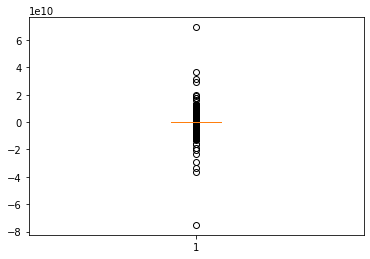

In [60]:
plt.boxplot(turnstiles_19_daily_entries_copy["DAILY_ENTRIES"])
plt.show()

In [61]:
Q1 = turnstiles_19_daily_entries_copy['DAILY_ENTRIES'].quantile(0.25)
Q3 = turnstiles_19_daily_entries_copy['DAILY_ENTRIES'].quantile(0.75)

IQR = (Q3 - Q1)
high = (Q3 + 1.5 * IQR)
low = (Q1 - 1.5 * IQR)

turnstiles_19_daily_entries_copy = turnstiles_19_daily_entries_copy[~((turnstiles_19_daily_entries_copy['DAILY_ENTRIES']<low)
                                                                      | (turnstiles_19_daily_entries_copy['DAILY_ENTRIES']>high))]
turnstiles_19_daily_entries_copy['DAILY_ENTRIES'].nlargest(10)

141005    23391.0
188953    23391.0
62068     23389.0
74791     23387.0
74065     23386.0
95219     23386.0
78256     23385.0
186199    23383.0
249200    23380.0
4935      23379.0
Name: DAILY_ENTRIES, dtype: float64

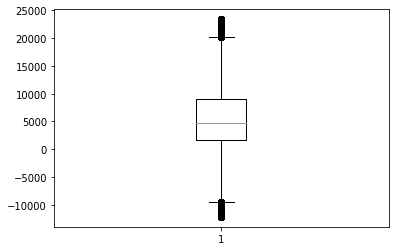

In [62]:
plt.boxplot(turnstiles_19_daily_entries_copy["DAILY_ENTRIES"])
plt.show()

In [63]:
turnstiles_19_daily_entries_copy["FIXED_DAILY_ENTRIES"] = (np.where(
    ((turnstiles_19_daily_entries_copy['ENTRIES']==0) & (turnstiles_19_daily_entries_copy['DAILY_ENTRIES']<0)), 0, 
          np.where(
              (turnstiles_19_daily_entries_copy['ENTRIES']!=0) & (turnstiles_19_daily_entries_copy['DAILY_ENTRIES']<0), abs(turnstiles_19_daily_entries_copy['DAILY_ENTRIES']), 
              turnstiles_19_daily_entries_copy['DAILY_ENTRIES'])))


In [64]:
turnstiles_19_daily_entries_copy.head()

,DIVISION,C/A,UNIT,SCP,STATION,DATE,ENTRIES,DAILY_ENTRIES,FIXED_DAILY_ENTRIES
1,BMT,A002,R051,02-00-00,59 ST,2019-10-02,43320754,7983.0,7983.0
2,BMT,A002,R051,02-00-00,59 ST,2019-10-03,43329261,8507.0,8507.0
3,BMT,A002,R051,02-00-00,59 ST,2019-10-04,43337583,8322.0,8322.0
4,BMT,A002,R051,02-00-00,59 ST,2019-10-05,43344347,6764.0,6764.0
5,BMT,A002,R051,02-00-00,59 ST,2019-10-06,43344576,229.0,229.0


In [65]:
print("Number of FIXED_DAILY_ENTRIES == 0: ", (turnstiles_19_daily_entries_copy['FIXED_DAILY_ENTRIES'] == 0).sum())
print("Number of FIXED_DAILY_ENTRIES < 0: ", (turnstiles_19_daily_entries_copy['FIXED_DAILY_ENTRIES'] < 0).sum())


Number of FIXED_DAILY_ENTRIES == 0:  24337
Number of FIXED_DAILY_ENTRIES < 0:  0


### *MTA 2021 Dataset*
Let's repeate some of things we did to turnstiles_19 on turnstiles_21!

In [66]:
print("There are", turnstiles_21.shape[0], "records in turnstiles_19")
turnstiles_21.head()

There are 1876633 records in turnstiles_19


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,DAY,YEAR,MONTH,TIME_PERIOD
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-06-26,00:00:00,7592792,2595706,2021-06-26 00:00:00,Saturday,2021,June,Night
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-06-26,04:00:00,7592804,2595713,2021-06-26 04:00:00,Saturday,2021,June,Night
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-06-26,08:00:00,7592816,2595729,2021-06-26 08:00:00,Saturday,2021,June,Morning
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-06-26,12:00:00,7592870,2595762,2021-06-26 12:00:00,Saturday,2021,June,Afternoon
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-06-26,16:00:00,7592992,2595791,2021-06-26 16:00:00,Saturday,2021,June,Afternoon


In [67]:
turnstiles_21 = turnstiles_21.sort_values(['DIVISION','STATION','UNIT','C/A','SCP','DATE_TIME'], ascending=True)
turnstiles_21.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,DAY,YEAR,MONTH,TIME_PERIOD
32769,H007,R248,00-00-00,1 AV,L,BMT,2021-05-29,00:00:00,15570192,17823915,2021-05-29 00:00:00,Saturday,2021,May,Night
32770,H007,R248,00-00-00,1 AV,L,BMT,2021-05-29,04:00:00,15570210,17823955,2021-05-29 04:00:00,Saturday,2021,May,Night
32771,H007,R248,00-00-00,1 AV,L,BMT,2021-05-29,08:00:00,15570219,17824095,2021-05-29 08:00:00,Saturday,2021,May,Morning
32772,H007,R248,00-00-00,1 AV,L,BMT,2021-05-29,12:00:00,15570265,17824350,2021-05-29 12:00:00,Saturday,2021,May,Afternoon
32773,H007,R248,00-00-00,1 AV,L,BMT,2021-05-29,16:00:00,15570367,17824796,2021-05-29 16:00:00,Saturday,2021,May,Afternoon


In [68]:
turnstiles_21['MONTH'].value_counts()

July    893773
June    893365
May      89495
Name: MONTH, dtype: int64

Again, we can see that the number of **May** records are **89495**, let's drop them.

In [69]:
turnstiles_21 = turnstiles_21[turnstiles_21['MONTH'] != 'May']
turnstiles_21['MONTH'].value_counts()

July    893773
June    893365
Name: MONTH, dtype: int64

let's calculate the difference between total entries per day, to get the **daily entries** in **2021**.

In [70]:
turnstiles_21_daily_entries = (turnstiles_21.groupby(['DIVISION', 'C/A', 'UNIT', 'SCP', 'STATION', 'DATE'])
                               ['ENTRIES'].sum()).reset_index()
turnstiles_21_daily_entries.head()

,DIVISION,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,BMT,A002,R051,02-00-00,59 ST,2021-06-01,45478820
1,BMT,A002,R051,02-00-00,59 ST,2021-06-02,45482315
2,BMT,A002,R051,02-00-00,59 ST,2021-06-03,45485751
3,BMT,A002,R051,02-00-00,59 ST,2021-06-04,45489170
4,BMT,A002,R051,02-00-00,59 ST,2021-06-05,45492226


In [71]:
turnstiles_21_daily_entries["DAILY_ENTRIES"] = turnstiles_21_daily_entries['ENTRIES'].diff()
turnstiles_21_daily_entries.head()

,DIVISION,C/A,UNIT,SCP,STATION,DATE,ENTRIES,DAILY_ENTRIES
0,BMT,A002,R051,02-00-00,59 ST,2021-06-01,45478820,NaN
1,BMT,A002,R051,02-00-00,59 ST,2021-06-02,45482315,3495.0
2,BMT,A002,R051,02-00-00,59 ST,2021-06-03,45485751,3436.0
3,BMT,A002,R051,02-00-00,59 ST,2021-06-04,45489170,3419.0
4,BMT,A002,R051,02-00-00,59 ST,2021-06-05,45492226,3056.0


In [72]:
turnstiles_21_daily_entries.tail()

,DIVISION,C/A,UNIT,SCP,STATION,DATE,ENTRIES,DAILY_ENTRIES
299421,SRT,S102,R165,00-05-01,TOMPKINSVILLE,2021-07-26,3924,0.0
299422,SRT,S102,R165,00-05-01,TOMPKINSVILLE,2021-07-27,3924,0.0
299423,SRT,S102,R165,00-05-01,TOMPKINSVILLE,2021-07-28,3924,0.0
299424,SRT,S102,R165,00-05-01,TOMPKINSVILLE,2021-07-29,3924,0.0
299425,SRT,S102,R165,00-05-01,TOMPKINSVILLE,2021-07-30,3924,0.0


In [73]:
turnstiles_21_daily_entries.dropna(subset=["DAILY_ENTRIES"], axis=0, inplace=True)
turnstiles_21_daily_entries.head()

,DIVISION,C/A,UNIT,SCP,STATION,DATE,ENTRIES,DAILY_ENTRIES
1,BMT,A002,R051,02-00-00,59 ST,2021-06-02,45482315,3495.0
2,BMT,A002,R051,02-00-00,59 ST,2021-06-03,45485751,3436.0
3,BMT,A002,R051,02-00-00,59 ST,2021-06-04,45489170,3419.0
4,BMT,A002,R051,02-00-00,59 ST,2021-06-05,45492226,3056.0
5,BMT,A002,R051,02-00-00,59 ST,2021-06-06,45494260,2034.0


Let's what we have in **DAILY_ENTRIES**!

In [74]:
print("Number of ENTRIES == 0: ", (turnstiles_21_daily_entries['DAILY_ENTRIES'] == 0).sum())
print("Number of ENTRIES < 0: ", (turnstiles_21_daily_entries['DAILY_ENTRIES'] < 0).sum())

Number of ENTRIES == 0:  25301
Number of ENTRIES < 0:  17980


In [75]:
print(turnstiles_21_daily_entries['DAILY_ENTRIES'].describe())

count    2.994250e+05
mean    -1.518741e+02
std      3.574562e+08
min     -9.616634e+10
25%      4.310000e+02
50%      1.653000e+03
75%      3.421000e+03
max      9.616633e+10
Name: DAILY_ENTRIES, dtype: float64


Same problem! Let's fix it!

In [76]:
turnstiles_21_daily_entries_copy = turnstiles_21_daily_entries.copy()
turnstiles_21_daily_entries_copy['DAILY_ENTRIES'].nlargest(10)

97351     9.616633e+10
34493     1.560274e+10
114196    1.410699e+10
235264    1.409607e+10
56083     1.288204e+10
86280     1.271973e+10
176431    1.269675e+10
176401    1.269647e+10
136532    1.239954e+10
277032    1.238269e+10
Name: DAILY_ENTRIES, dtype: float64

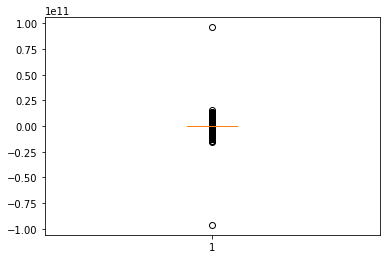

In [77]:
plt.boxplot(turnstiles_21_daily_entries_copy["DAILY_ENTRIES"])
plt.show()

In [78]:
Q1 = turnstiles_21_daily_entries_copy['DAILY_ENTRIES'].quantile(0.25)
Q3 = turnstiles_21_daily_entries_copy['DAILY_ENTRIES'].quantile(0.75)

IQR = (Q3 - Q1)
high = (Q3 + 1.5 * IQR)
low = (Q1 - 1.5 * IQR)

turnstiles_21_daily_entries_copy = turnstiles_21_daily_entries_copy[~((turnstiles_21_daily_entries_copy['DAILY_ENTRIES']<low)
                                                                      | (turnstiles_21_daily_entries_copy['DAILY_ENTRIES']>high))]
turnstiles_21_daily_entries_copy['DAILY_ENTRIES'].nlargest(10)

113292    7906.0
180821    7906.0
194045    7906.0
196689    7906.0
270282    7906.0
275478    7906.0
130043    7905.0
153949    7905.0
153957    7905.0
253070    7905.0
Name: DAILY_ENTRIES, dtype: float64

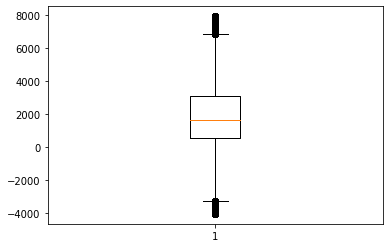

In [79]:
plt.boxplot(turnstiles_21_daily_entries_copy["DAILY_ENTRIES"])
plt.show()

In [80]:
turnstiles_21_daily_entries_copy["FIXED_DAILY_ENTRIES"] = (np.where(
    ((turnstiles_21_daily_entries_copy['ENTRIES']==0) & (turnstiles_21_daily_entries_copy['DAILY_ENTRIES']<0)), 0, 
          np.where(
              (turnstiles_21_daily_entries_copy['ENTRIES']!=0) & (turnstiles_21_daily_entries_copy['DAILY_ENTRIES']<0), abs(turnstiles_21_daily_entries_copy['DAILY_ENTRIES']), 
              turnstiles_21_daily_entries_copy['DAILY_ENTRIES'])))


In [81]:
turnstiles_21_daily_entries_copy.head()

,DIVISION,C/A,UNIT,SCP,STATION,DATE,ENTRIES,DAILY_ENTRIES,FIXED_DAILY_ENTRIES
1,BMT,A002,R051,02-00-00,59 ST,2021-06-02,45482315,3495.0,3495.0
2,BMT,A002,R051,02-00-00,59 ST,2021-06-03,45485751,3436.0,3436.0
3,BMT,A002,R051,02-00-00,59 ST,2021-06-04,45489170,3419.0,3419.0
4,BMT,A002,R051,02-00-00,59 ST,2021-06-05,45492226,3056.0,3056.0
5,BMT,A002,R051,02-00-00,59 ST,2021-06-06,45494260,2034.0,2034.0


In [82]:
print("Number of FIXED_DAILY_ENTRIES == 0: ", (turnstiles_21_daily_entries_copy['FIXED_DAILY_ENTRIES'] == 0).sum())
print("Number of FIXED_DAILY_ENTRIES < 0: ", (turnstiles_21_daily_entries_copy['FIXED_DAILY_ENTRIES'] < 0).sum())


Number of FIXED_DAILY_ENTRIES == 0:  25318
Number of FIXED_DAILY_ENTRIES < 0:  0


<a id='Storing,analyzing,visualizing'></a>
## Part IV - Storing, analyzing, and visualizing the wrangled data

Now it is time to answer our questions!

### Q1. What are the most active stations?

In [83]:
turnstiles_21_daily_entries_copy_2 = turnstiles_21_daily_entries_copy.copy()
turnstiles_19_daily_entries_copy_2 = turnstiles_19_daily_entries_copy.copy()

In [84]:
turnstiles_21_station_total = turnstiles_21_daily_entries_copy_2.groupby(['STATION'])[['FIXED_DAILY_ENTRIES']].sum().reset_index()
turnstiles_21_station_total.head(5)

,STATION,FIXED_DAILY_ENTRIES
0,1 AV,2557342.0
1,103 ST,3434721.0
2,103 ST-CORONA,2013937.0
3,104 ST,616816.0
4,110 ST,1304320.0


In [85]:
turnstiles_19_station_total = turnstiles_19_daily_entries_copy_2.groupby(['STATION'])[['FIXED_DAILY_ENTRIES']].sum().reset_index()
turnstiles_19_station_total.head(5)

,STATION,FIXED_DAILY_ENTRIES
0,1 AV,3467457.0
1,103 ST,8874698.0
2,103 ST-CORONA,5492931.0
3,104 ST,1329434.0
4,110 ST,3266212.0


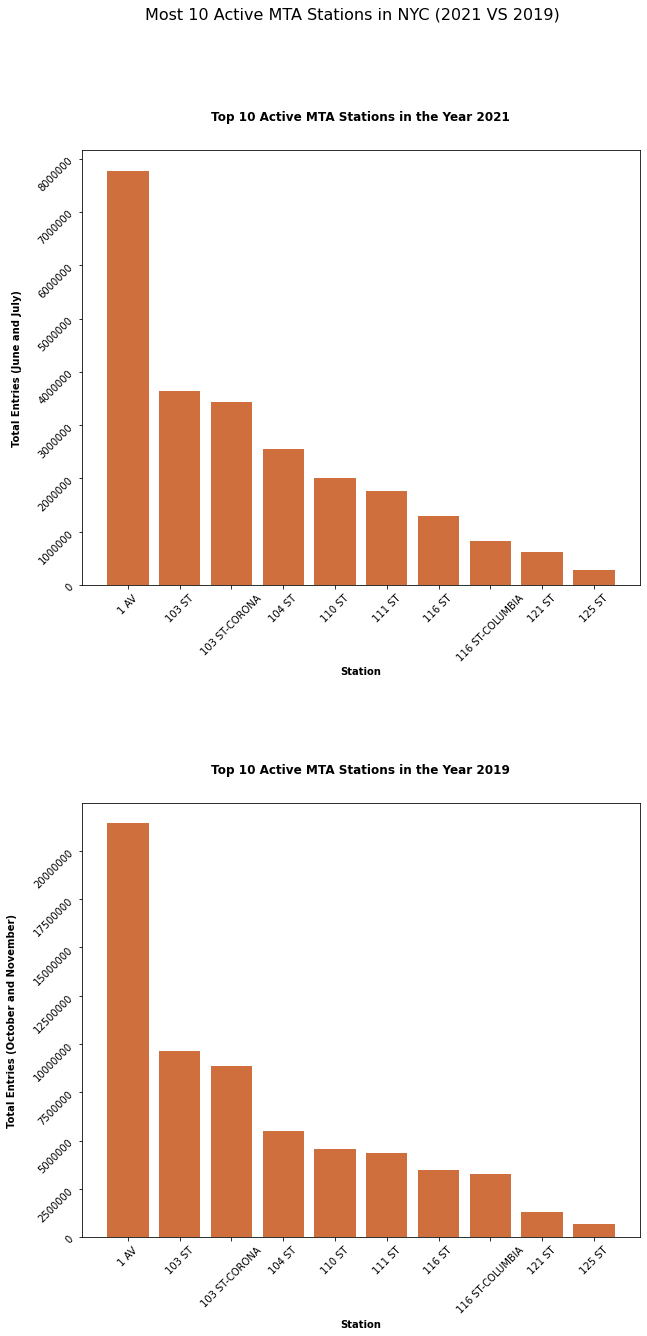

In [86]:
fig, ax = plt.subplots(2, 1, figsize=(20, 20))

fig.set_figwidth(10)
fig.set_figheight(20)

fig.suptitle('Most 10 Active MTA Stations in NYC (2021 VS 2019)', fontsize = 16)

ax[0].bar(turnstiles_21_station_total['STATION'][:10], turnstiles_21_station_total['FIXED_DAILY_ENTRIES'][:10].sort_values(ascending=False), color ='#cf6f3e')
ax[0].set_title('Top 10 Active MTA Stations in the Year 2021',  pad=30, fontweight='bold')
ax[0].set_ylabel('Total Entries (June and July)', labelpad=15, fontweight='bold')
ax[0].set_xlabel('Station', fontweight='bold')
ax[0].tick_params(labelrotation=45)
ax[0].yaxis.get_major_formatter().set_scientific(False)
ax[0].yaxis.get_major_formatter().set_useOffset(False)
# ax[0].grid()

fig.subplots_adjust(hspace=0.5)

ax[1].bar(turnstiles_19_station_total['STATION'][:10], turnstiles_19_station_total['FIXED_DAILY_ENTRIES'][:10].sort_values(ascending=False), color ='#cf6f3e')
ax[1].set_title('Top 10 Active MTA Stations in the Year 2019', pad=30, fontweight='bold');
ax[1].set_ylabel('Total Entries (October and November)', labelpad=15, fontweight='bold')
ax[1].set_xlabel('Station', fontweight='bold')
ax[1].tick_params(labelrotation=45)
ax[1].yaxis.get_major_formatter().set_scientific(False)
ax[1].yaxis.get_major_formatter().set_useOffset(False)
# ax[1].grid()

> **Observation**: As you can see, there is a big difference between 1 AV Station and other stations. Also, 2019 and 2021 have same pattern! 


### Q2. What are the most active times for stations?

In [87]:
turnstiles_21_copy = turnstiles_21.copy()
turnstiles_19_copy = turnstiles_19.copy()

In [88]:
# turnstiles_21_copy["ENTRIES_PER_TURNSTILE"] = turnstiles_21_copy['ENTRIES'].diff()
# turnstiles_21_copy.dropna(subset=["ENTRIES_PER_TURNSTILE"], axis=0, inplace=True)
# turnstiles_21_copy.head()

In [89]:
# turnstiles_21_copy["FIXED_ENTRIES_PER_TURNSTILE"] = (np.where(
#     ((turnstiles_21_copy['ENTRIES']==0) & (turnstiles_21_copy['ENTRIES_PER_TURNSTILE']<0)), 0, 
#           np.where(
#               (turnstiles_21_copy['ENTRIES']!=0) & (turnstiles_21_copy['ENTRIES_PER_TURNSTILE']<0), abs(turnstiles_21_copy['ENTRIES_PER_TURNSTILE']), 
#               turnstiles_21_copy['ENTRIES_PER_TURNSTILE'])))

In [90]:
# turnstiles_21_time_periods = (turnstiles_21_copy.groupby(['TIME_PERIOD'])['FIXED_ENTRIES_PER_TURNSTILE']
#                               .sum()).reset_index()
# turnstiles_21_time_periods

In [91]:
turnstiles_21_time_periods = turnstiles_21_copy['TIME_PERIOD'].value_counts().reset_index()
turnstiles_21_time_periods

,index,TIME_PERIOD
0,Afternoon,596811
1,Night,476651
2,Morning,414970
3,Evening,298706


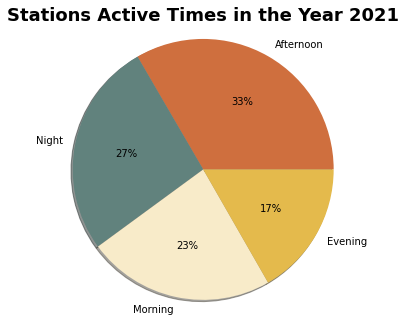

In [92]:
colors = ['#cf6f3e', '#61827d', '#f8ebc9', '#e4ba4c']
#plt.title('Number of Tunrstiles in Time Periods')
plt.pie(turnstiles_21_time_periods['TIME_PERIOD'], labels = turnstiles_21_time_periods['index'], colors=colors, 
        autopct='%.0f%%', radius=1.5, shadow=True)
plt.rcParams['font.size'] = 15
plt.title('Stations Active Times in the Year 2021',  pad=40, fontweight='bold')
plt.show()

> **Observation**: Many turnstiles accrues at Night and Afternoon.
>Metro Motion should avoid working in those times in the crowded stations.

In [93]:
turnstiles_19_time_periods = turnstiles_19_copy['TIME_PERIOD'].value_counts().reset_index()
turnstiles_19_time_periods

,index,TIME_PERIOD
0,Afternoon,585727
1,Night,516069
2,Morning,364802
3,Evening,292793


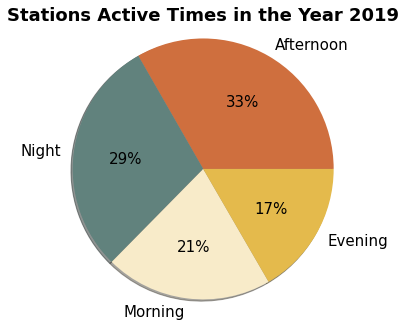

In [94]:
colors = ['#cf6f3e', '#61827d', '#f8ebc9', '#e4ba4c']
#plt.title('Number of Tunrstiles in Time Periods')
plt.pie(turnstiles_19_time_periods['TIME_PERIOD'], labels = turnstiles_19_time_periods['index'], colors=colors, 
        autopct='%.0f%%', radius=1.5, shadow=True)
plt.rcParams['font.size'] = 15
plt.title('Stations Active Times in the Year 2019',  pad=40, fontweight='bold')
plt.show()

> **Observation**:  Once again, 2019 have same pattern as 2021!

In [95]:
# turnstiles_21_time_periods_stations = (turnstiles_21_copy.groupby(['STATION','TIME_PERIOD'])['FIXED_ENTRIES_PER_TURNSTILE']
#                                        .sum()).reset_index()
# turnstiles_21_time_periods_stations.head()

In [96]:
# station1 = turnstiles_21_time_periods_stations[turnstiles_21_time_periods_stations['STATION'] == '1 AV']
# station2 = turnstiles_21_time_periods_stations[turnstiles_21_time_periods_stations['STATION'] == '103 ST']
# station3 = turnstiles_21_time_periods_stations[turnstiles_21_time_periods_stations['STATION'] == '103 ST-CORONA']

In [97]:
#station1

In [98]:
# colors = ['#cf6f3e', '#61827d', '#f8ebc9', '#e4ba4c']
# #plt.title('Number of Tunrstiles in Time Periods')
# plt.pie(station1['FIXED_ENTRIES_PER_TURNSTILE'], labels = station1['TIME_PERIOD'], colors=colors, 
#         autopct='%.0f%%', radius=1.5, shadow=True)
# plt.rcParams['font.size'] = 15
# plt.show()

In [99]:
#station2

In [100]:
# colors = ['#cf6f3e', '#61827d', '#f8ebc9', '#e4ba4c']
# #plt.title('Number of Tunrstiles in Time Periods')
# plt.pie(station2['FIXED_ENTRIES_PER_TURNSTILE'], labels = station2['TIME_PERIOD'], colors=colors, 
#         autopct='%.0f%%', radius=1.5, shadow=True)
# plt.rcParams['font.size'] = 15
# plt.show()

In [101]:
#station3

In [102]:
# colors = ['#cf6f3e', '#61827d', '#f8ebc9', '#e4ba4c']
# #plt.title('Number of Tunrstiles in Time Periods')
# plt.pie(station3['FIXED_ENTRIES_PER_TURNSTILE'], labels = station3['TIME_PERIOD'], colors=colors, 
#         autopct='%.0f%%', radius=1.5, shadow=True)
# plt.rcParams['font.size'] = 15
# plt.show()

### Q3. What are the most active days for stations?

In [103]:
turnstiles_21_daily_entries_copy_2 = turnstiles_21_daily_entries_copy.copy()
turnstiles_19_daily_entries_copy_2 = turnstiles_19_daily_entries_copy.copy()

In [104]:
turnstiles21_days = turnstiles_21_daily_entries_copy_2.groupby(['DATE'])['FIXED_DAILY_ENTRIES'].sum().reset_index()


turnstiles21_days["DATE"] = pd.to_datetime(turnstiles21_days["DATE"])
turnstiles21_days['DAY'] = turnstiles21_days['DATE'].dt.day_name()
turnstiles21_days.head()

,DATE,FIXED_DAILY_ENTRIES,DAY
0,2021-06-01,131080.0,Tuesday
1,2021-06-02,9900987.0,Wednesday
2,2021-06-03,9907040.0,Thursday
3,2021-06-04,9651581.0,Friday
4,2021-06-05,9053458.0,Saturday


In [105]:
days_21 = turnstiles21_days.groupby(['DAY'])['FIXED_DAILY_ENTRIES'].sum().reset_index()
days_21

,DAY,FIXED_DAILY_ENTRIES
0,Friday,89450346.0
1,Monday,61476189.0
2,Saturday,73396346.0
3,Sunday,56562188.0
4,Thursday,90202313.0
5,Tuesday,77610904.0
6,Wednesday,90150428.0


In [106]:
turnstiles19_days = turnstiles_19_daily_entries_copy_2.groupby(['DATE'])['FIXED_DAILY_ENTRIES'].sum().reset_index()


turnstiles19_days["DATE"] = pd.to_datetime(turnstiles19_days["DATE"])
turnstiles19_days['DAY'] = turnstiles19_days['DATE'].dt.day_name()
turnstiles19_days.head()

,DATE,FIXED_DAILY_ENTRIES,DAY
0,2019-10-01,562624.0,Tuesday
1,2019-10-02,29241358.0,Wednesday
2,2019-10-03,31074574.0,Thursday
3,2019-10-04,31549029.0,Friday
4,2019-10-05,26420313.0,Saturday


In [107]:
days_19 = turnstiles19_days.groupby(['DAY'])['FIXED_DAILY_ENTRIES'].sum().reset_index()
days_19

,DAY,FIXED_DAILY_ENTRIES
0,Friday,261214933.0
1,Monday,154984858.0
2,Saturday,209647512.0
3,Sunday,129515824.0
4,Thursday,267224819.0
5,Tuesday,234551790.0
6,Wednesday,271271140.0


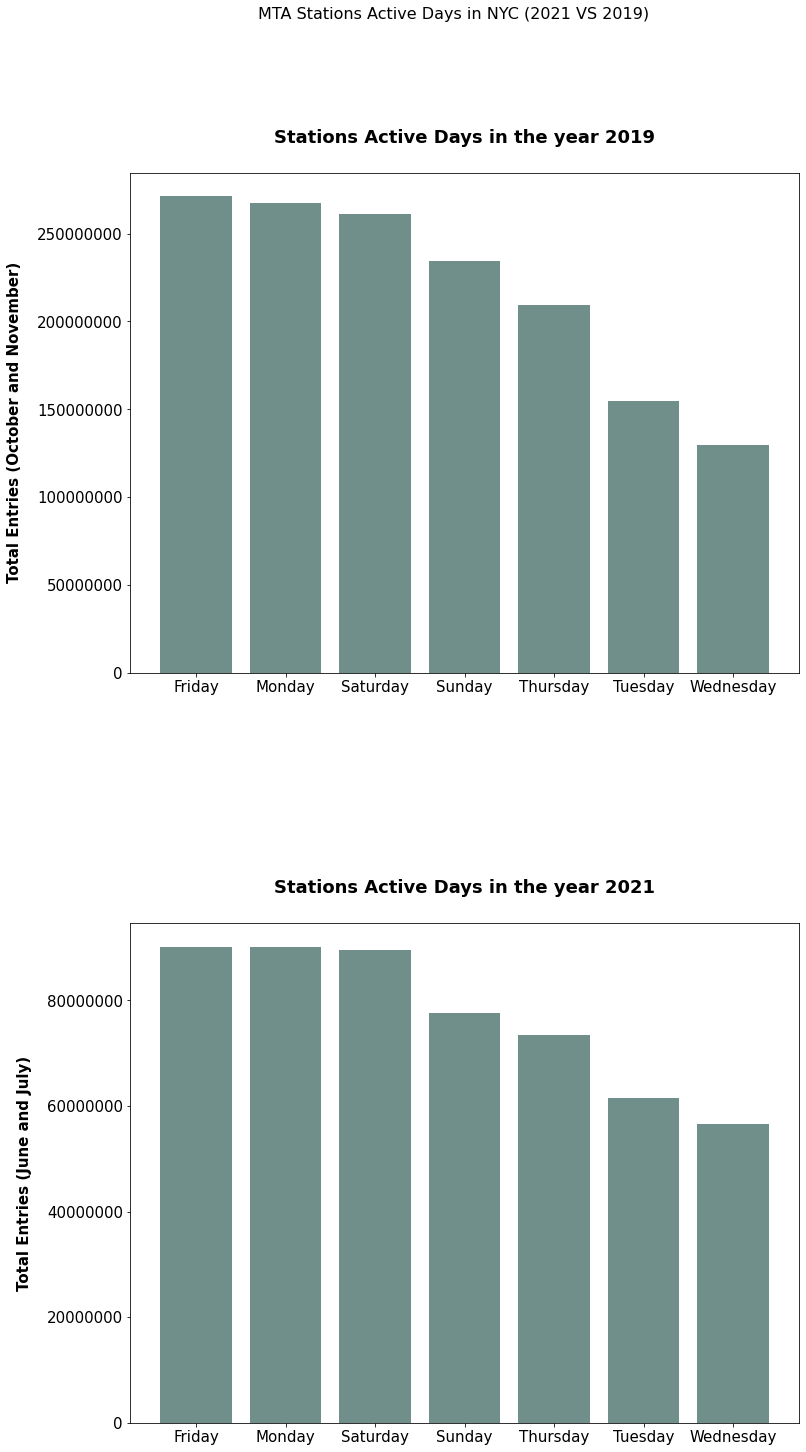

In [108]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

fig.set_figwidth(12)
fig.set_figheight(23)

fig.suptitle('MTA Stations Active Days in NYC (2021 VS 2019)', fontsize = 16)

ax[0].bar(days_19['DAY'], days_19['FIXED_DAILY_ENTRIES'].sort_values(ascending=False), color='#708e8a')
ax[0].set_title('Stations Active Days in the year 2019', pad=30, fontweight='bold')
ax[0].set_ylabel('Total Entries (October and November)', labelpad=15, fontweight='bold')
ax[0].yaxis.get_major_formatter().set_scientific(False)
ax[0].yaxis.get_major_formatter().set_useOffset(False)

fig.subplots_adjust(hspace=0.5)
 
ax[1].bar(days_21['DAY'], days_21['FIXED_DAILY_ENTRIES'].sort_values(ascending=False), color='#708e8a')
ax[1].set_title('Stations Active Days in the year 2021', pad=30, fontweight='bold');
ax[1].set_ylabel('Total Entries (June and July)', labelpad=15, fontweight='bold')
ax[1].yaxis.get_major_formatter().set_scientific(False)
ax[1].yaxis.get_major_formatter().set_useOffset(False)


> **Observation**: Most active days are weekends, and the start of the week. It gets less by the end of the week.

<a id='Conclusion'></a>
## Part V - Conclusion

>- There is a big difference between 1 AV Station and other stations. Also, 2019 and 2021 have same pattern!
>- Many turnstiles accrues at Night and Afternoon, **Metro Motion** should avoid working in those times in the crowded stations.
>- Most active days are weekends, and the start of the week. It gets less by the end of the week.
>- **Metro Motion** Should provide the cleaning and repairing services for the less crowded stations in the morning or at night, in the start of the week or by the end of it.
>
>- **Metro Motion** Should provide the cleaning and repairing for the crowded stations at Evening, in the middle of week.